In [2]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from word2number import w2n
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

In [3]:
data=pd.read_csv('hiring.csv')

In [4]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
data.experience=data.experience.fillna('zero')

In [6]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [7]:
data.experience=data.experience.apply(w2n.word_to_num)

In [8]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [9]:
score_mean=data['test_score(out of 10)'].mean()
data['test_score(out of 10)']=data['test_score(out of 10)'].fillna(score_mean)

In [10]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [11]:
x=data.drop('salary($)',axis=1)
y=data['salary($)']

In [12]:
model=DecisionTreeRegressor()

In [13]:
model.fit(x,y)

DecisionTreeRegressor()

In [14]:
model.get_depth()

4

In [15]:
model.score(x,y)

1.0

In [16]:
y_pred=model.predict(x)
pd.DataFrame({'True Values':y,'Predictions':y_pred})

,True Values,Predictions
0,50000,50000.0
1,45000,45000.0
2,60000,60000.0
3,65000,65000.0
4,70000,70000.0
5,62000,62000.0
6,72000,72000.0
7,80000,80000.0


In [17]:
cm=confusion_matrix(y,y_pred)
print(cm)

[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


Text(50.722222222222214, 0.5, 'True Values')

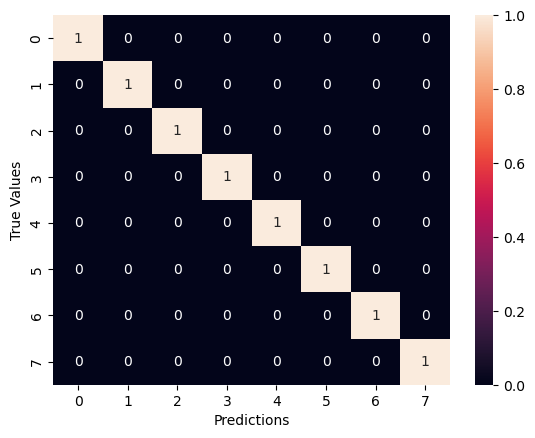

In [18]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predictions')
plt.ylabel('True Values')

In [19]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

       45000       1.00      1.00      1.00         1
       50000       1.00      1.00      1.00         1
       60000       1.00      1.00      1.00         1
       62000       1.00      1.00      1.00         1
       65000       1.00      1.00      1.00         1
       70000       1.00      1.00      1.00         1
       72000       1.00      1.00      1.00         1
       80000       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [20]:
model.predict([[5,10,8]])

C:\Users\Amjad\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([65000.])

In [5]:
from sklearn import tree
fig=plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=x.columns,class_names='salary($)',filled=True)

NameError: name 'model' is not defined

<Figure size 1500x1500 with 0 Axes>